# Dataset analysis

## 1. Review and understand all columns. 

Importing libraries, loading the dataset and getting its info.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split

df = pd.read_csv('StudentPerformanceFactors.csv', header=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

To understand better the columns, it is necessary to calculate correlation between numerical columns. To do this, we need a list of the numerical features of the dataset. Then, we get the correlation only of this numerical features. \
As we can see, Hours_Studied and Attendance have the highest correlation. It is possible that a training method that works better with non-related columns will be suitable.

In [2]:
obj_exc = df.select_dtypes(exclude=['object']).columns.tolist()
df[obj_exc].corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


## 2. Ensure no missing values (NaN).

Only the columns Teacher_Quality, Parental_Education_Level, and Distance_from_Home have some missing values.

In [3]:
print(df.isnull().sum()) # total missing values

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


The removing null and duplicate values is performed. The dataset size decreased for this process.

In [5]:
df_dr_na = df.dropna()
df_ms = df_dr_na.drop_duplicates()
print('Shape after removing duplicates:', df_ms.shape)

Shape after removing duplicates: (6378, 20)


## 3. Ensure correct data types.

As checked previously, there are some object datatypes in the dataset. It is necessary to change them to achieve our objective. \
After this process, the column types are valid for the training process

In [6]:
cat_lst = df_ms.select_dtypes(include=['object']).columns.tolist()
df_cat = pd.get_dummies(df_ms, columns = cat_lst, prefix = cat_lst)

df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6378 non-null   int64
 1   Attendance                             6378 non-null   int64
 2   Sleep_Hours                            6378 non-null   int64
 3   Previous_Scores                        6378 non-null   int64
 4   Tutoring_Sessions                      6378 non-null   int64
 5   Physical_Activity                      6378 non-null   int64
 6   Exam_Score                             6378 non-null   int64
 7   Parental_Involvement_High              6378 non-null   bool 
 8   Parental_Involvement_Low               6378 non-null   bool 
 9   Parental_Involvement_Medium            6378 non-null   bool 
 10  Access_to_Resources_High               6378 non-null   bool 
 11  Access_to_Resources_Low            

## 4. Detect and remove or adjust outliers.

This section uses Tukey's fences method to calculate the number of outliers of the numerical columns in the dataset. The calculation is made for all the numerical features. Finally, the number of outliers is presented in addition to their percentage from the total data.

In [7]:
# Select features with datatypes integer
num_lst = df_cat.select_dtypes(include=['int64']).columns.tolist()
# remove target feature
num_lst.remove('Exam_Score')
# Get total rows
tot_data = df_cat.shape[0]
# Create the DataFrame with the number of outliers
data = pd.DataFrame(columns=['Feature', 'Number of Outliers', 'Percentage of total'])


for col in num_lst:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = ((df_cat[col] < lower_bound) | (df_cat[col] > upper_bound)).sum()
    # Add the result to the DataFRame
    data.loc[len(data)] = [col, outliers, round((outliers / tot_data) * 100, 2)]

# Show the total data
print('Total Data:', tot_data)
# Show the DataFrame with the count of outliers
data

Total Data: 6378


,Feature,Number of Outliers,Percentage of total
0,Hours_Studied,40,0.63
1,Attendance,0,0.00
2,Sleep_Hours,0,0.00
3,Previous_Scores,0,0.00
4,Tutoring_Sessions,423,6.63
5,Physical_Activity,0,0.00


Hours_Studied and Tutoring_Sessions features have more outliers. Nevertheless, the values do not represent a significant amount of data. \
To visually see them, we show the boxplot of the features with outliers.

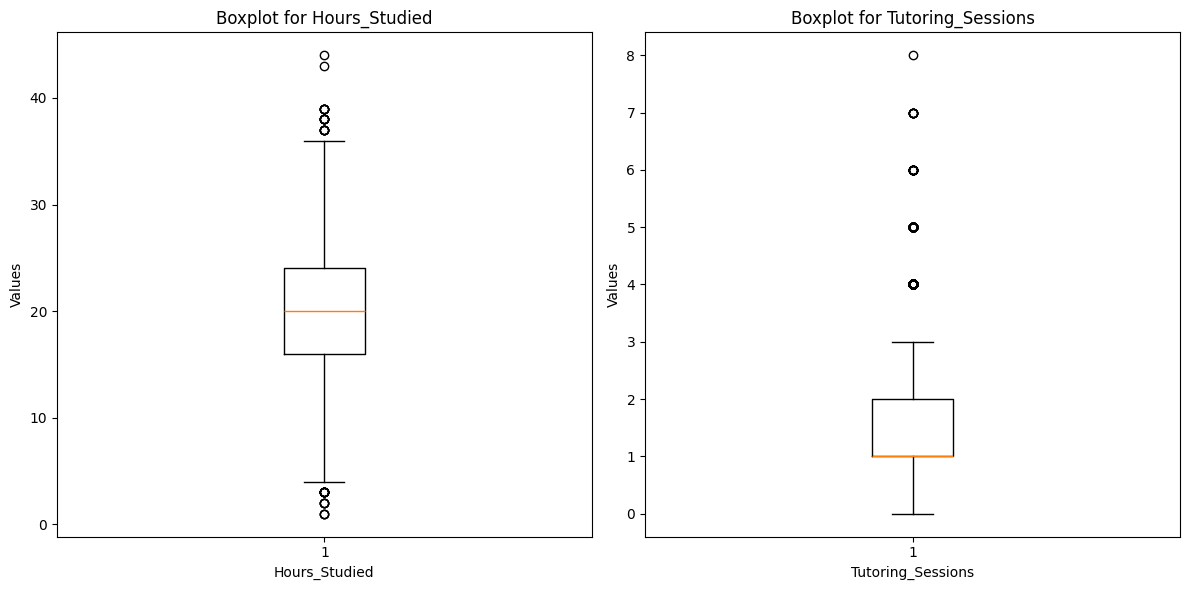

In [8]:
# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for Hours_Studied
ax1.boxplot(df_cat['Hours_Studied'])
ax1.set_title('Boxplot for Hours_Studied')
ax1.set_xlabel('Hours_Studied')
ax1.set_ylabel('Values')

# Boxplot for Tutoring_Sessions
ax2.boxplot(df_cat['Tutoring_Sessions'])
ax2.set_title('Boxplot for Tutoring_Sessions')
ax2.set_xlabel('Tutoring_Sessions')
ax2.set_ylabel('Values')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

To get more perspective, we plot the scatterplot. For the boxplot, the Tutoring sessions data seems to be right-skewed.

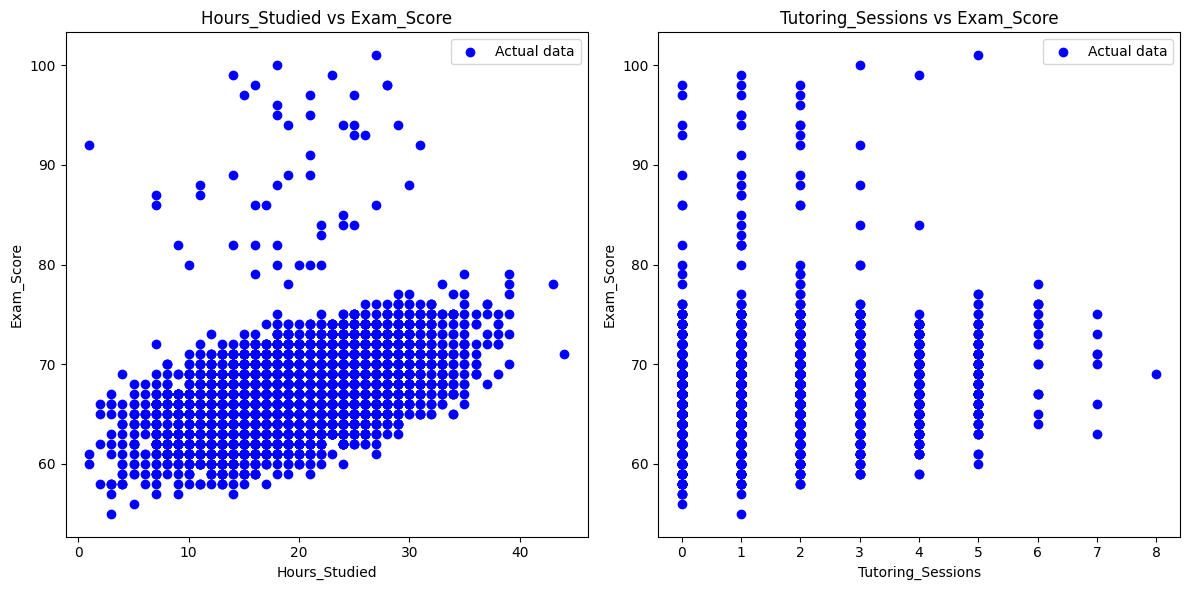

In [13]:
# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for Hours_Studied
X_data = df_cat['Hours_Studied']
y_data = df_cat['Exam_Score']
ax1.scatter(X_data, y_data, color="blue", label="Actual data")
ax1.set_title('Hours_Studied vs Exam_Score')
ax1.set_xlabel('Hours_Studied')
ax1.set_ylabel('Exam_Score')
ax1.legend()

# Boxplot for Tutoring_Sessions
X_data = df_cat['Tutoring_Sessions']
ax2.scatter(X_data, y_data, color="blue", label="Actual data")
ax2.set_title('Tutoring_Sessions vs Exam_Score')
ax2.set_xlabel('Tutoring_Sessions')
ax2.set_ylabel('Exam_Score')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

One of the limitations of Tukey Fences is when the data is skewed. In this case, the outliers are not appropriately calculated. In this case, Z-Score is used. After this calculation, the table has the correct numbers of outliers.

In [9]:
# Calculate mean and standard deviation
mean_medinc = df_cat['Tutoring_Sessions'].mean()
std_medinc = df_cat['Tutoring_Sessions'].std()

# Calculate Z-score
z_scores = (df_cat['Tutoring_Sessions'] - mean_medinc) / std_medinc

# Identify data points where the Z-score is greater than 3 or less than -3
outliers_zscore = df_cat[abs(z_scores) > 3]

#Update the dataframe with the outlier data with the new information
#print("Number of outliers detected by Zscore: ",outliers_zscore.shape[0])
data.loc[4, 'Number of Outliers'] = outliers_zscore.shape[0]
data.loc[4, 'Percentage of total'] = round((outliers_zscore.shape[0] / tot_data) * 100, 2)
data

,Feature,Number of Outliers,Percentage of total
0,Hours_Studied,40,0.63
1,Attendance,0,0.00
2,Sleep_Hours,0,0.00
3,Previous_Scores,0,0.00
4,Tutoring_Sessions,26,0.41
5,Physical_Activity,0,0.00


Checking outliers in the categorical features is quite different because they do not have outliers in a traditional sense. We can count the True values of each bool column corresponding to a category to check which column has a small number of occurrences. The smaller the count of True values, the column can be considered as an outlier. It is going to be considered that the column must have less equals than 5% of the total data as an outlier.

In [10]:
# Create the DataFrame with the count of outliers
data = pd.DataFrame(columns=['Feature', 'True occurrences', 'Percentage of total'])
# Get the list of categories
cat_lst = df_cat.select_dtypes(exclude=['int64']).columns.tolist()

for col in cat_lst:
    # Counting the True ocurrences
    tot = df_cat[col][df_cat[col] == True].count()
    # Add the result to the DataFRame
    data.loc[len(data)] = [col, tot, round((tot / tot_data) * 100, 2)]

# Show the total data
print('Total Data:', tot_data)
# Show the DataFrame with the total of outliers
data[data['Percentage of total'] <= 5]

Total Data: 6378


,Feature,True occurrences,Percentage of total


## 5. Remove any useless columns. 

### Low Variance

Features with low variance have almost the same values for all observations. These don’t provide much information. \
To calculate variance with all columns, first the boolean values must be integer. The next step is to calculate the variance, The describe method from the daraframe gives us a Series of standard deviation. To get the variance they have to be squared.\
The threshold selected to check low variance is 0.1. As numerical values they are useless but in practical terms, these features are important. Therefore, they will not be discarded. 

In [15]:
df_rep = df_cat.replace({False: 0, True: 1}, inplace=False).infer_objects(copy=False)
df_rep_fil = df_rep.describe().loc['std'] ** 2
df_rep_fil[df_rep_fil <= 0.1]

C:\Users\xavie\AppData\Local\Temp\ipykernel_28472\48544311.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rep = df_cat.replace({False: 0, True: 1}, inplace=False).infer_objects(copy=False)


Internet_Access_No           0.070271
Internet_Access_Yes          0.070271
Teacher_Quality_Low          0.091166
Learning_Disabilities_No     0.093780
Learning_Disabilities_Yes    0.093780
Distance_from_Home_Far       0.089788
Name: std, dtype: float64

### High Correlation

Features highly correlated with others might be redundant. You can remove one of each pair of highly correlated features. There are no highly correlated columns, therefore, all columns are important for the model.

In [16]:
df_cat.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
Hours_Studied,1.000000,-0.004997,0.013119,0.022492,-9.653592e-03,0.003183,0.445104,-0.012496,0.011707,0.001909,...,0.013920,-0.013920,-0.011881,0.011701,-0.000961,0.012639,0.008679,-0.015855,0.007192,-0.007192
Attendance,-0.004997,1.000000,-0.019602,-0.018083,1.207039e-02,-0.022976,0.580259,-0.000548,0.013753,-0.010558,...,0.020877,-0.020877,0.006008,-0.023374,0.022279,-0.016911,-0.007714,0.017560,-0.004621,0.004621
Sleep_Hours,0.013119,-0.019602,1.000000,-0.023238,-1.146552e-02,-0.002898,-0.017171,-0.003348,0.003951,-0.000143,...,-0.014177,0.014177,0.009336,-0.013128,0.005666,-0.005788,0.007692,-0.003678,0.009938,-0.009938
Previous_Scores,0.022492,-0.018083,-0.023238,1.000000,-1.315776e-02,-0.006694,0.174283,-0.012950,0.021831,-0.005818,...,-0.005434,0.005434,-0.021406,0.019513,0.000226,0.000106,-0.013428,0.012526,0.000067,-0.000067
Tutoring_Sessions,-0.009654,0.012070,-0.011466,-0.013158,1.000000e+00,0.016325,0.156829,0.003266,0.009036,-0.010220,...,-0.006698,0.006698,0.002105,-0.004483,0.003179,-0.011454,-0.008663,0.015117,0.005571,-0.005571
Physical_Activity,0.003183,-0.022976,-0.002898,-0.006694,1.632530e-02,1.000000,0.025148,-0.007712,0.000842,0.006308,...,-0.011558,0.011558,-0.005666,0.027487,-0.027806,-0.014063,0.005284,0.003632,-0.006978,0.006978
Exam_Score,0.445104,0.580259,-0.017171,0.174283,1.568293e-01,0.025148,1.000000,0.139715,-0.112410,-0.036191,...,0.083911,-0.083911,0.017953,-0.090413,0.092247,-0.064088,-0.044868,0.081204,0.004932,-0.004932
Parental_Involvement_High,-0.012496,-0.000548,-0.003348,-0.012950,3.265623e-03,-0.007712,0.139715,1.000000,-0.320291,-0.648272,...,-0.012108,0.012108,0.013423,-0.005100,-0.009050,-0.007029,0.007718,-0.002945,0.024994,-0.024994
Parental_Involvement_Low,0.011707,0.013753,0.003951,0.021831,9.036035e-03,0.000842,-0.112410,-0.320291,1.000000,-0.513661,...,0.000271,-0.000271,0.008923,-0.012821,0.005757,0.004251,0.003488,-0.005867,-0.000391,0.000391
Parental_Involvement_Medium,0.001909,-0.010558,-0.000143,-0.005818,-1.022042e-02,0.006308,-0.036191,-0.648272,-0.513661,1.000000,...,0.010748,-0.010748,-0.019329,0.014925,0.003569,0.002949,-0.009794,0.007383,-0.022323,0.022323


In [17]:
import matplotlib.pyplot as plt

def plot_corr_mtrx(corr_matrix, round=False):
    # rounds to two decimals
    if round:
        corr_matrix = df.corr().round(2)
    
    # Plot the correlation matrix using Matplotlib
    plt.figure(figsize=(8, 6))
    # fignum tells Matplotlib to plot the matrix on the first figure. 
    # If you have multiple figures, you can use different numbers to 
    # plot on different figures.
    plt.matshow(corr_matrix, fignum=1)
    # adds a color scale to the side
    plt.colorbar()
    
    # Add labels
    # rotation=45: This rotates the labels by 45 degrees for better readability, 
    # especially if the labels are long
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    
    plt.show()

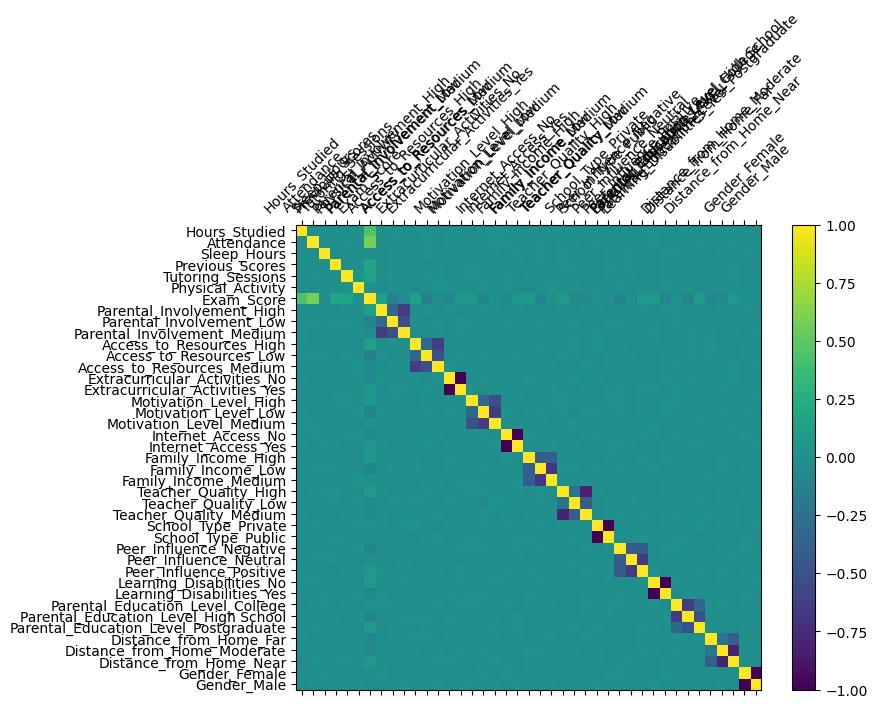

In [18]:
plot_corr_mtrx(df_cat.corr())

At this point, the dataset is ready.

In [19]:
df_cat.head(5)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,False,True,False,...,True,False,False,True,False,False,False,True,False,True
1,19,64,8,59,2,4,61,False,True,False,...,True,False,True,False,False,False,True,False,True,False
2,24,98,7,91,2,4,74,False,False,True,...,True,False,False,False,True,False,False,True,False,True
3,29,89,8,98,1,4,71,False,True,False,...,True,False,False,True,False,False,True,False,False,True
4,19,92,6,65,3,4,70,False,False,True,...,True,False,True,False,False,False,False,True,True,False


# Algorithm Application

## Split data into training, validation, and test datasets.

The data is ready to begin the training. We need to split the dataset to training (80%), validation (10%), and test (10%).

In [20]:
y = df_cat['Exam_Score']
X = df_cat.drop(columns=['Exam_Score'])

# Split data into train (80%), validation (10%), and test set (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
# Temporary corresponds to 20% of dataset, this must be divides into half and a
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Classification

We are going to classify if a student pass the course. To do this, we are going to categorize Exam_Score to the following:

Exam_Score >= 60 is True (Student Pass)
Exam_Score < 60 is False (Student Fail)

In [53]:
df_cat['Exam_Score_Cls'] = pd.cut(df['Exam_Score'], [0, 59, df_cat['Exam_Score'].max()], labels=[0,1])

For the purpose of the algorithm, the data must be splitted again

In [54]:
y_cls = df_cat['Exam_Score_Cls']
X_cls = df_cat.drop(columns=['Exam_Score','Exam_Score_Cls'])

# Split data into train (80%), and test set (20%)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42) 

### Logistic Regression

Using k-fold cross-validation to validate the model. The validation uses 10 folds. The results show that the model is consistent.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

k_folds = KFold(n_splits = 10)

model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, X_train_cls, y_train_cls, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99608611 0.99804305 0.99607843 0.99411765 1.         0.99803922
 0.99803922 0.99803922 0.99803922 0.99019608]
Average CV Score:  0.9966678178120564
Number of CV Scores used in Average:  10


Training and predicting with the trained model.

In [ ]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_cls, y_train_cls)

# Make predictions (probabilities and class labels)
y_pred_prob = model.predict_proba(X_train_cls)[:, 1]  # Probabilities for class 1
y_pred_train = model.predict(X_train_cls)  # Predicted class labels

### Evaluation

Function to graph the confusion matrix.

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

def graphConfusionMatrix(model, X_test, y_test, title):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

Calculating confusion matrix and performance metrics from the classification model.

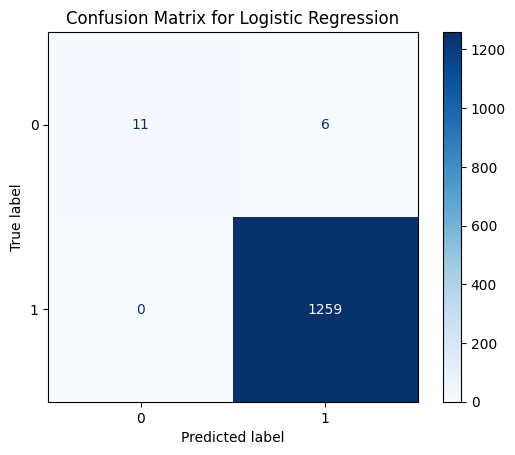

Performance metrics
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Specificity: 0.65
FP rate: 0.35


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_test = model.predict(X_test_cls)
conf_matrix_te = confusion_matrix(y_test_cls, y_pred_test)
#print("Confusion Matrix: \n", conf_matrix_te)
graphConfusionMatrix(model, X_test_cls, y_test_cls, "Confusion Matrix for Logistic Regression")

print("Performance metrics")
# Calculate accuracy
accuracy = accuracy_score(y_test_cls, y_pred_test)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision 
precision = precision_score(y_test_cls, y_pred_test)
print(f"Precision: {precision:.2f}")

# Calculate recall 
recall = recall_score(y_test_cls, y_pred_test)
print(f"Recall: {recall:.2f}")

# Calculate specificity (True Negative Rate)
tn, fp, fn, tp = conf_matrix_te.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

fp_rate = fp / (fp + tn)
print(f"FP rate: {fp_rate:.2f}")